# Import libraries

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from unidecode import unidecode

# Import vocabulary

In [3]:
# Read json file vocabulary
with open('../data/vocabulary/test_vocabulary.json', 'r') as f:
    vocabulary = json.load(f)
print("Total size of vocabulary: ", len(vocabulary))

Total size of vocabulary:  18020


# Sort vocabulary by the values

In [4]:
# Sort the dictionary by frequency in descending order
vocabulary = dict(sorted(vocabulary.items(), key=lambda item: item[1], reverse=True))
list_words = list(vocabulary.keys())
list_freq = list(vocabulary.values())
# Show the first 3 keys
print(list_words[:3])

['experiencia', 'trabajar', 'cliente']


# Global frequency distribution

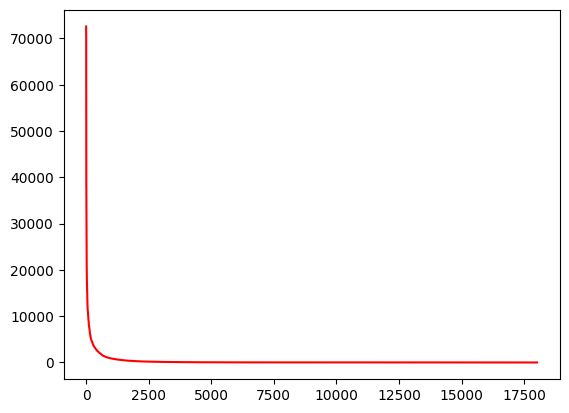

In [5]:
# Plot the values of the vocabulary
word_index = np.arange(len(list_words))
plt.plot(word_index, list_freq, 'r')

# Show the first 50

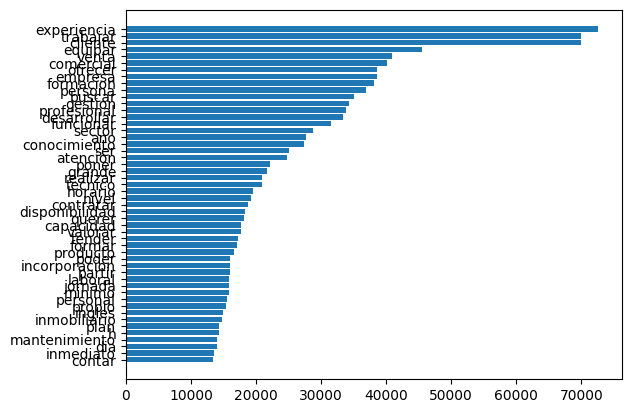

In [6]:
# Plot the top 50 values of the vocabulary in a bar plot, with keys on the y-axis and values on the x-axis
N = 50
partial_freq = list_freq[:N][::-1]
partial_words_ = list_words[:N][::-1]
plt.barh(partial_words_, partial_freq)
plt.show()

# Show the last 50

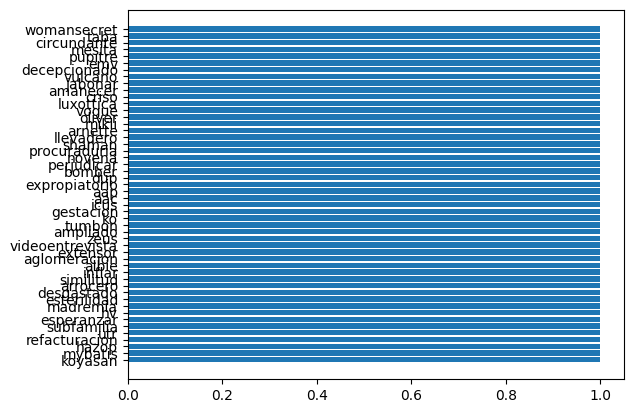

In [7]:
N = 50
partial_freq = list_freq[-N:][::-1]
partial_words_ = list_words[-N:][::-1]
plt.barh(partial_words_, partial_freq)
plt.show()

# Import data

In [8]:
# Read dataframe
df = pd.read_json("../data/test/test_palabras_nuevas.json")
df.head()

,ID_OFERTA,ID_PUESTO_ESCO_ULL,CATEGORIA,SUBCATEGORIA,PALABRAS_EMPLEO_TEXTO_NUEVAS
0,ef5a8ae0a743018628df9bd53893bb,1634,Administracion de empresas,Administracion,ADMINISTRATIVO INGLES NAVISION TURNAR EMPRESA ...
1,47137c06a640348ca4cb7dcbf938b1,611,Sanidad y salud,Medicina general,MEDICAR FUNCIONAR DESEMPENAR PROPIO PONER MEDI...
2,cdfb72672340819a6721db72eee187,2825,Comercial y ventas,Comercial,REPARTIDOR BUSCAR PERSONA PONER CHOFER REPARTI...
3,5746210e854264aaca9452f4d377a4,1984,Ventas al detalle,Venta al detalle,DEPENDIENTE ABRIR PROCESAR SELECCION DEPENDIEN...
4,8a1bda0c91438bb4133f32e392a1ce,1984,Ventas al detalle,Venta al detalle,DEPENDIENTE STRADIVARIUS CC PALMERO FUERTEVENT...


In [9]:
def create_vocabulary_by_df(df):
    vocabulary = {}
    for index, row in df['PALABRAS_EMPLEO_TEXTO_NUEVAS'].items():
        words = row.split(" ")
        for word in words:
            word = unidecode(word).lower()
            if word in vocabulary:
                vocabulary[word] += 1
            else:
                vocabulary[word] = 1
    return vocabulary
vocabulary = create_vocabulary_by_df(df)
print("Total size of vocabulary: ", len(vocabulary))

Total size of vocabulary:  18020


# Group by ID_PUESTO_ESCO_ULL

In [10]:
# Group by ID_PUESTO_ESCO_ULL and sum the PALABRAS_EMPLEO_TEXTO_NUEVAS column for each group
df_sum = df.groupby("ID_PUESTO_ESCO_ULL")["PALABRAS_EMPLEO_TEXTO_NUEVAS"].sum().reset_index()
# This will create a DataFrame with the sum of PALABRAS_EMPLEO_TEXTO_NUEVAS for each group
df_sum.head()

,ID_PUESTO_ESCO_ULL,PALABRAS_EMPLEO_TEXTO_NUEVAS
0,33,SECRETAR DIRECCION BUSCAR SECRETAR DIRECCION T...
1,39,DIRECTOR NUEVA AGENCIAR PREVENCION COMPANIA AM...
2,41,DIRECTOR GENERAL SELECCIONAR DIRECTOR GENERAL ...
3,42,DIRECTOR EJECUTIVO PALMAR CONSULTORIA ENERGETI...
4,44,DIRECTOR OPERACION FUNCIONAR EMPRESARIAL FAMIL...


# Create vocabulary by occupation

In [11]:
def create_dict_occupation_word_freq(df_sum):
    # Create vocabulary_df word:count in a dictionary for each group
    vocabulary_df = {}
    for index, row in df_sum.iterrows():
        vocabulary_ocupation = {}
        for word in row["PALABRAS_EMPLEO_TEXTO_NUEVAS"].split(" "):
            if word in vocabulary_ocupation:
                vocabulary_ocupation[word] += 1
            else:
                vocabulary_ocupation[word] = 1
        # Sort the vocabulary by the values
        vocabulary_ocupation = sorted(vocabulary_ocupation.items(), key=lambda x: x[1], reverse=True)
        vocabulary_df[row["ID_PUESTO_ESCO_ULL"]] = vocabulary_ocupation
    return vocabulary_df

def get_words_freq_list_by_occupation(vocabulary_df, occupation):
    # Get the list of words and frequency for a given occupation
    vocabulary_ocupation = vocabulary_df[occupation]
    list_words = []
    list_freq = []
    for word, frequency in vocabulary_ocupation:
        list_words.append(word)
        list_freq.append(frequency)
    return list_words, list_freq

vocabulary_df = create_dict_occupation_word_freq(df_sum)
# Show the first 3 keys
print(list(vocabulary_df.keys())[:3])

[33, 39, 41]


# Occupation frequency distribution

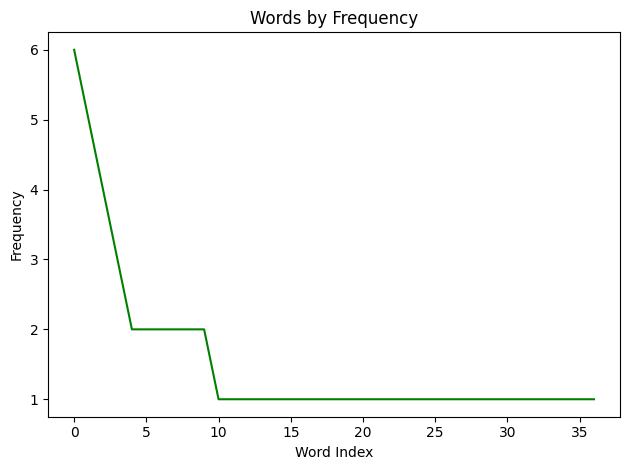

In [12]:
def show_graph_occupation(vocabulary_df, occupation):
    # Get the vocabulary of occupation
    vocabulary_occupation = vocabulary_df[occupation]
    # Separate the words and counts for plotting
    words, counts = zip(*vocabulary_occupation)
    # Create the bar plot
    plt.plot(range(len(words)), counts, color="green")
    plt.xlabel("Word Index")
    plt.ylabel("Frequency")
    plt.title("Words by Frequency")
    plt.tight_layout()  # Ensure the labels fit nicely
    plt.show()
n_words = 10
occupation = 1853
show_graph_occupation(vocabulary_df, occupation)

# Create metric Importancia

In [13]:
def get_list_words_by_occupation(vocabulary_df, occupation):
    return [x[0] for x in vocabulary_df[occupation]]

def get_words_freq_list_by_occupation(vocabulary_df, occupation):
    return [x[1] for x in vocabulary_df[occupation]]

def get_global_freq_by_list_words(vocabulary, list_words):
    global_freq = {}
    # Find all the words in the vocabulary
    for word in list_words:
        if word.lower() in vocabulary:
            global_freq[word] = vocabulary[word.lower()]
        else:
            # Put Infinite in this case
            global_freq[word] = np.inf
    return global_freq

def get_partial_freq_by_occupation(vocabulary_df, occupation):
    list_words_ocupation = get_list_words_by_occupation(vocabulary_df, occupation)
    list_freq_ocupation = get_words_freq_list_by_occupation(vocabulary_df, occupation)
    # Create a dictionary with the words and frequency for the occupation
    partial_freq = {}
    for word, freq in zip(list_words_ocupation, list_freq_ocupation):
        partial_freq[word] = freq
    return partial_freq

def get_importancia_by_occupation(vocabulary_df, vocabulary, occupation):
    importancia = {}
    list_words = get_list_words_by_occupation(vocabulary_df, occupation)
    partial_freq = get_partial_freq_by_occupation(vocabulary_df, occupation)
    global_freq = get_global_freq_by_list_words(vocabulary, list_words)
    # Divide the partial frequency by the global frequency
    for word in list_words:
        importancia[word] = partial_freq[word] / global_freq[word]
    importancia = dict(sorted(importancia.items(), key=lambda item: item[1], reverse=True))
    return importancia

def create_importancia_df(vocabulary_df, vocabulary):
    importancia_df = {}
    list_occupations = list(vocabulary_df.keys())
    for occupation in list_occupations:
        importancia_df[occupation] = get_importancia_by_occupation(vocabulary_df, vocabulary, occupation)
    return importancia_df
importancia_df = create_importancia_df(vocabulary_df, vocabulary)

# Visualization new metric

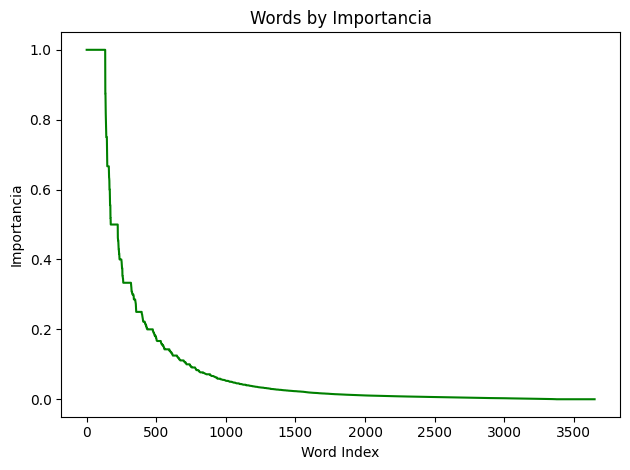

In [14]:
def graph_metric_by_occupation(importancia_df, occupation):
    # Get the vocabulary of occupation
    vocabulary_occupation = importancia_df[occupation]
    # Get the keys and values for plotting
    words = list(vocabulary_occupation.keys())
    counts = list(vocabulary_occupation.values())
    # Create the bar plot
    plt.plot(range(len(words)), counts, color="green")
    plt.xlabel("Word Index")
    plt.ylabel("Importancia")
    plt.title("Words by Importancia")
    plt.tight_layout()  # Ensure the labels fit nicely
    plt.show()
occupation = 941
graph_metric_by_occupation(importancia_df, occupation)
importancia = get_importancia_by_occupation(vocabulary_df, vocabulary, occupation)
# Save to json file
with open('../data/vocabulary/importancia.json', 'w') as f:
    json.dump(importancia, f)

In [21]:
def create_vocabulary_by_importancia_df(importancia_df):
    list_occupations = list(importancia_df.keys())
    vocabulary = {}
    for occupation in list_occupations:
        importancia = importancia_df[occupation]
        list_words = list(importancia.keys())
        list_importancia = list(importancia.values())
        for word, importance in zip(list_words, list_importancia):
            if importance > 0.4:
                if word not in vocabulary:
                    vocabulary[word] = 0
    return vocabulary
new_vocabulary = create_vocabulary_by_importancia_df(importancia_df)
print("New vocabulary size: ", len(new_vocabulary))
# Save to json file
with open('../data/vocabulary/vocabulary_importancia.json', 'w') as f:
    json.dump(new_vocabulary, f)

New vocabulary size:  10458


In [22]:
importancia_ocupation = get_importancia_by_occupation(vocabulary_df, vocabulary, occupation)
# Sort the dictionary by frequency in descending order
importancia_ocupation = dict(sorted(importancia_ocupation.items(), key=lambda item: item[1], reverse=True))

# Save the dataframe with the words in vocabulary

In [23]:
# Save the dataframe and get only the words inside the vocabulary
def get_words_by_vocabulary(df, vocabulary):
    df["PALABRAS_EMPLEO_TEXTO_NUEVAS"] = df["PALABRAS_EMPLEO_TEXTO_NUEVAS"].apply(lambda x: " ".join([word for word in x.split(" ") if word in vocabulary]))
    # Sort alphabetically the words
    df["PALABRAS_EMPLEO_TEXTO_NUEVAS"] = df["PALABRAS_EMPLEO_TEXTO_NUEVAS"].apply(lambda x: " ".join(sorted(x.split(" "))))
    # Delete repeated words on the same row
    df["PALABRAS_EMPLEO_TEXTO_NUEVAS"] = df["PALABRAS_EMPLEO_TEXTO_NUEVAS"].apply(lambda x: " ".join(dict.fromkeys(x.split(" "))))
    return df
df = get_words_by_vocabulary(df, new_vocabulary)
df.head()
# Save to json file
df.to_json("../data/test/test_palabras_nuevas.json")